## Dependecies

In [172]:
import pickle
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

## Loading needed data

In [174]:
ohe_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/OHE_X_train.pkl', 'rb'))
we_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/WE_X_train.pkl', 'rb'))
y_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/y_train.pkl', 'rb'))

## Building the Model

### Sequential

In [175]:
model = Sequential()

model.add(Embedding(input_dim=len(y_train), output_dim=150, 
                    input_length=28, trainable=True))
model.add(LSTM(150, dropout=0.1, return_sequences=True))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(3, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [176]:
n_EPOCHS = 10
BATCH_SIZE = 40
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 28, 150)           600000    
                                                                 
 lstm_64 (LSTM)              (None, 28, 150)           180600    
                                                                 
 lstm_65 (LSTM)              (None, 150)               180600    
                                                                 
 dense_35 (Dense)            (None, 3)                 453       
                                                                 
Total params: 961,653
Trainable params: 961,653
Non-trainable params: 0
_________________________________________________________________


In [177]:
train = model.fit(we_train, y_train,
                  epochs=n_EPOCHS)

Epoch 1/10
125/125 [==============================] - 28s 117ms/step - loss: 0.9871 - accuracy: 0.4997
Epoch 2/10
125/125 [==============================] - 15s 117ms/step - loss: 0.8225 - accuracy: 0.6090
Epoch 3/10
125/125 [==============================] - 15s 118ms/step - loss: 0.7209 - accuracy: 0.6562
Epoch 4/10
125/125 [==============================] - 15s 117ms/step - loss: 0.5426 - accuracy: 0.7875
Epoch 5/10
125/125 [==============================] - 15s 117ms/step - loss: 0.4161 - accuracy: 0.8512
Epoch 6/10
125/125 [==============================] - 15s 116ms/step - loss: 0.3484 - accuracy: 0.8838
Epoch 7/10
125/125 [==============================] - 15s 116ms/step - loss: 0.3019 - accuracy: 0.9050
Epoch 8/10
125/125 [==============================] - 15s 116ms/step - loss: 0.2613 - accuracy: 0.9193
Epoch 9/10
125/125 [==============================] - 15s 117ms/step - loss: 0.2384 - accuracy: 0.9252
Epoch 10/10
125/125 [==============================] - 14s 116ms/step - l

#### Accuracy and Loss Visualization

Text(0, 0.5, 'Accuracy')

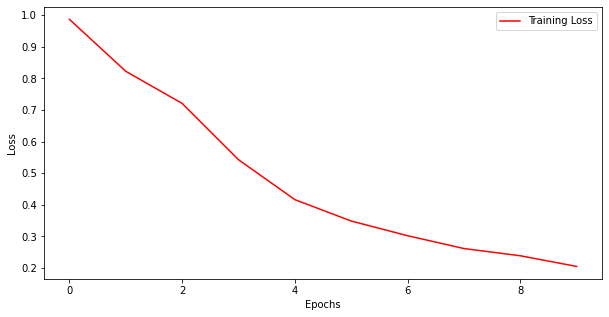

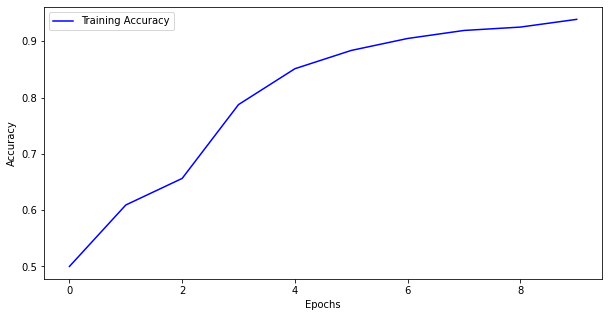

In [183]:

plt.figure(figsize=(10, 5))
plt.plot(train.history['loss'], 'red')
# plt.plot(train.history['val_loss'], 'red')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(10, 5))
plt.plot(train.history['accuracy'], 'blue')
# plt.plot(train.history['val_accuracy'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')